In [76]:
import beorn;import numpy as np
from beorn import run;from beorn.astro import f_star_Halo

from beorn.plotting import *
from beorn.functions import *

In [87]:
param = beorn.par()

# Halo Mass bins
param.sim.Mh_bin_min = 1e7
param.sim.Mh_bin_max = 1e15
param.sim.binn = 40  # nbr of halo mass bin

# name your simulation
param.sim.model_name = 'test_2LPT'
# Nbr of cores to use
param.sim.cores = 1  

# cosmo
param.cosmo.Om = 0.31
param.cosmo.Ob = 0.045
param.cosmo.Ol = 0.69
param.cosmo.h = 0.68

# Box size and Number of pixels
Lbox = 100 # cMpc/h
Ncell = 64
param.sim.Lbox = Lbox
param.sim.Ncell = Ncell
param.sim.halo_catalogs = './21cmFAST_data/halos_21cmFast_' + str(Ncell) + '_B100.z'  ## path to dir with halo catalogs + filename
param.sim.dens_field =  './21cmFAST_data/dens_21cmFast_' + str(Ncell) + '_B100.z' # None
param.sim.dens_field_type = '21cmFAST'

param.sim.store_grids = ['Tk','bubbles','lyal' ,'dTb'] 

# define k bins for PS measurement
kmin = 1 / Lbox
kmax = Ncell / Lbox
kbin = int(6 * np.log10(kmax / kmin))
param.sim.kmin = kmin
param.sim.kmax = kmax
param.sim.kbin = kbin

In [88]:
# Choose a redshift
z = 7
param.solver.Nz = [z]  

# Create halo catalogues and density field, calling 21cmFAST
Dict = beorn.simulate_matter_21cmfast(param, redshift_list=[z], IC=None, data_dir=None)


Ncell is  64
No slice number provided, plotting the slice (:,Ncell/2,:)


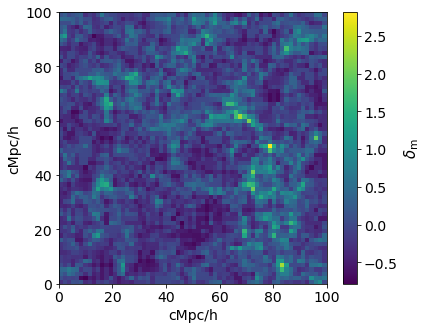

In [71]:
delta_m  = beorn.load_grid(param, z=z, type='matter')
plot_2d_map(delta_m, Lbox=Lbox,  qty=r'$\delta_{\mathrm{m}}$',scale='lin')


redshift is 7 Lbox is : 100


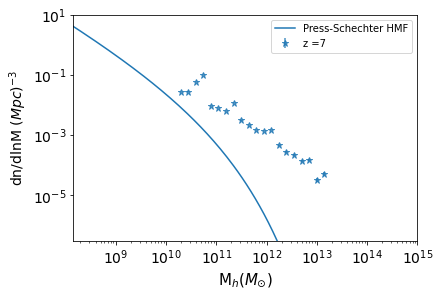

In [79]:
from beorn.halomassfunction import from_catalog_to_hmf
from beorn.halomassfunction import HMF as hmf

fig = plt.figure(constrained_layout=True)

#Measure the HMF from the halo catalog
Halo_dict = load_halo(param, z)
HMF_from_sim = from_catalog_to_hmf(Halo_dict,bin_nbr=20)
plt.errorbar(HMF_from_sim[0]/0.68,HMF_from_sim[1]*0.68**3,HMF_from_sim[2]*0.68**3,marker = '*',linestyle='',markersize=7,color='C'+str(0),alpha=0.8,label='z ='+str(round(z,2)))
plt.loglog([],[])


#Compare to Press-Schechter HMF
param.hmf.z = np.array([z])
HMF_Beorn = hmf(param)
HMF_Beorn.generate_HMF(param)
plt.loglog(HMF_Beorn.tab_M/0.68,HMF_Beorn.HMF[0]*0.68**3,color='C0',label='Press-Schechter HMF')


plt.ylim(3e-7,1e1)
plt.xlim(1.45e8,1e15)
plt.ylabel('dn/dlnM $(Mpc)^{-3}$', fontsize=14)
plt.xlabel('M$_{h}  (M_{\odot})$', fontsize=15)
plt.tick_params(axis="both",labelsize=14)
plt.legend()

In [105]:
# Source parameters
# lyman-alpha 
param.source.N_al = 9690  # 1500
param.source.alS_lyal = 0.0
# ion
param.source.Nion = 300  
# xray
param.source.E_min_xray = 500
param.source.E_max_xray = 10000
param.source.E_min_sed_xray = 200
param.source.E_max_sed_xray = 10000
param.source.alS_xray = 1.5
param.source.cX = 0.1 * 3.4e40

# fesc
param.source.f0_esc = 0.2
param.source.pl_esc = 0.5

# fstar
param.source.f_st = 0.05
param.source.g1 = 0.49
param.source.g2 = -0.61
param.source.g3 = 4
param.source.g4 = -4
param.source.Mp = 1.6e11 * param.cosmo.h
param.source.Mt = 1e9

# Minimum star forming halo
param.source.M_min = 1e8

# Mass Accretion Rate model (EXP or EPS)
param.source.MAR = 'EPS'

#COMPUTE PROFILES 
run.compute_profiles(param)

Computing Temperature (Tk), Lyman-α and ionisation fraction (xHII) profiles...
param.solver.Nz is given as a list.
param.solver.fXh is set to constant. We will assume f_X,h = 2e-4**0.225
...  Profiles stored in dir ./profiles.
 
It took 00:00:40 to compute the profiles.


## Plot the profiles

z, Mh =  13.0 , 7.63e+08
z, Mh =  10.0 , 6.29e+09
z, Mh =  7.0 , 7.33e+10


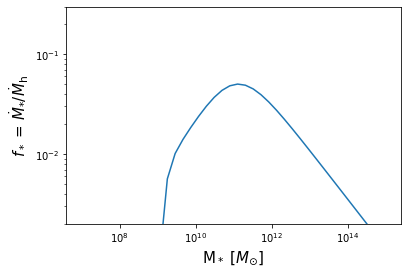

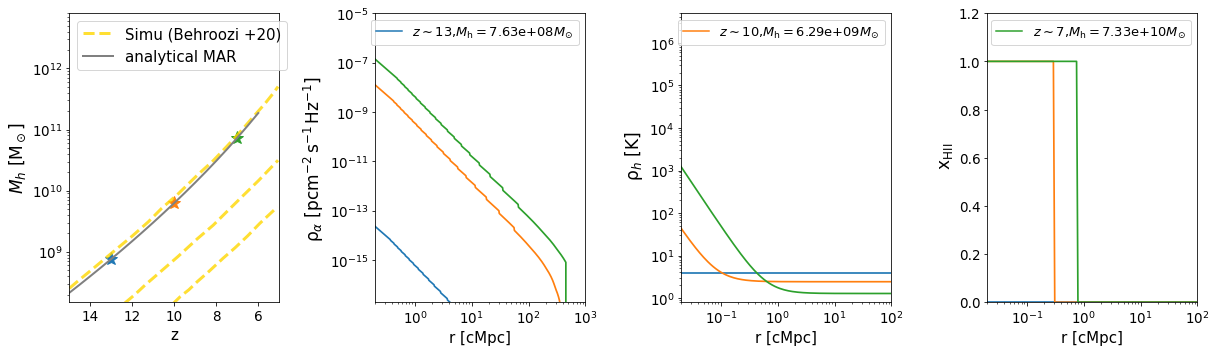

In [106]:
profiles = beorn.load_f('./profiles/'+param.sim.model_name+'.pkl')
plt.loglog(profiles.M_Bin,f_star_Halo(param,profiles.M_Bin))
plt.ylim(0.002,0.3)
plt.ylabel(r'$f_*$ = $\dot{M}_{*}/\dot{M}_{\mathrm{h}}  $', fontsize=15)
plt.xlabel('M$_*$ $[M_{\odot}]$', fontsize=15)
ind_M = 20
plot_1D_profiles(param,profiles,ind_M,z_liste=[13,10,7])

In [107]:
# Step 2 : Paint Boxes and read and write GS and PS in ./physics/
run.paint_boxes(param, RSD=False, ion=True, temp=True, dTb=True, lyal=True, check_exists = False, cross_corr=True)

# Step 3 : gather the GS_PS files at different redshifts and create a single GS_PS.pkl file.
run.gather_GS_PS_files(param,remove = False)


Painting profiles on a grid with 64 pixels per dim. Box size is 100 cMpc/h.
param.solver.Nz is given as a list.
Core nbr 0 is taking care of z =  7
----- Painting 3D map for z = 7 -------
There are 280487 halos at z= 7
Looping over halo mass bins and painting profiles on 3D grid .... 
Quick calculation from the profiles predicts xHII =  0.185
28892 halos in mass bin  17 . It took 00:00:01 to paint the profiles.
62160 halos in mass bin  18 . It took 00:00:01 to paint the profiles.
30752 halos in mass bin  19 . It took 00:00:02 to paint the profiles.
117862 halos in mass bin  20 . It took 00:00:02 to paint the profiles.
8592 halos in mass bin  21 . It took 00:00:02 to paint the profiles.
16717 halos in mass bin  22 . It took 00:00:02 to paint the profiles.
3494 halos in mass bin  23 . It took 00:00:02 to paint the profiles.
5801 halos in mass bin  24 . It took 00:00:02 to paint the profiles.
1637 halos in mass bin  25 . It took 00:00:03 to paint the profiles.
2484 halos in mass bin  26 .

Ncell is  64
No slice number provided, plotting the slice (:,Ncell/2,:)
Ncell is  64
No slice number provided, plotting the slice (:,Ncell/2,:)
Ncell is  64
No slice number provided, plotting the slice (:,Ncell/2,:)
Ncell is  64
No slice number provided, plotting the slice (:,Ncell/2,:)


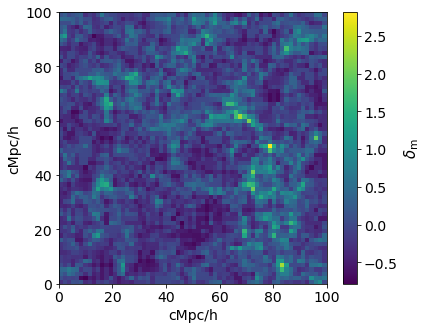

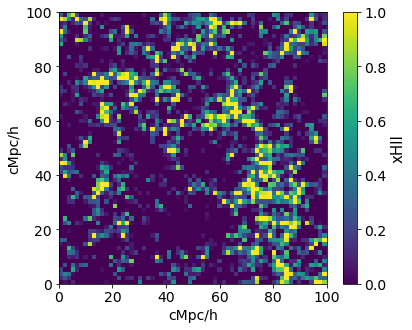

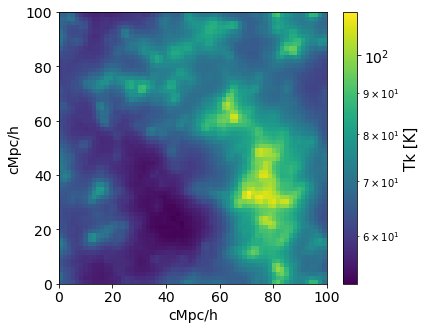

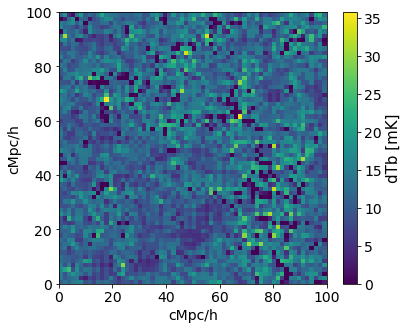

In [111]:
dTb_map   = beorn.load_grid(param, z=z, type='dTb')
T_map     = beorn.load_grid(param, z=z, type='Tk')
xHII_map  = beorn.load_grid(param, z=z, type='bubbles')
xal_map   = beorn.load_grid(param, z=z, type='lyal')

plot_2d_map(delta_m, Lbox=Lbox,  qty=r'$\delta_{\mathrm{m}}$',scale='lin')
plot_2d_map(xHII_map, Lbox=Lbox, qty='xHII')
plot_2d_map(T_map, Lbox=Lbox, qty='Tk [K]',scale='log')
plot_2d_map(dTb_map, Lbox=Lbox, qty='dTb [mK]')



Ncell is  64
No slice number provided, plotting the slice (:,Ncell/2,:)


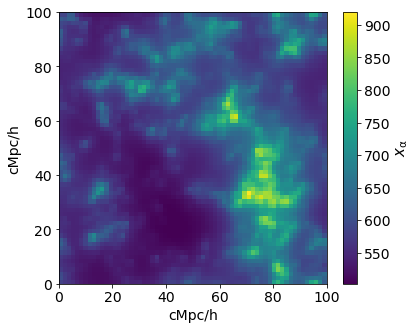

In [110]:
plot_2d_map(xal_map, Lbox=Lbox, qty=r'$x_{\mathrm{\alpha}}$')